In [2]:
import pygeostat as gs
% matplotlib inline

Autoloading `gsParams` from C:\Users\nayrm/.gsParams
Autoloading `gsPlotStyle` from C:\Users\nayrm/.gsParams


In [3]:
import spatialcluster as sp

In [4]:
custom = {"savefig.dpi": 125,
            "figure.dpi": 125,
            "figure.figsize": (4, 3),
            "axes.grid": True,
            'grid.alpha': 1.0,
            'grid.color': 'black',
            'grid.linestyle': '-.',
            'grid.linewidth': 0.25,
            "axes.formatter.useoffset": False,
            "xtick.major.pad": 1,
            "ytick.major.pad": 1}
gs.set_style("pt7", custom)

In [5]:
datfl = gs.DataFile("testdat.dat")

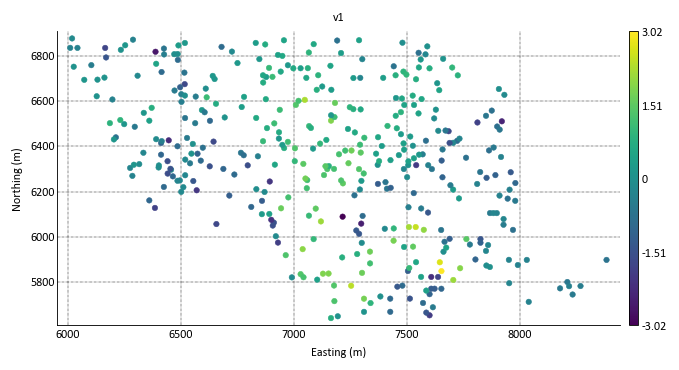

In [6]:
gs.locmap(datfl, var='v1', figsize=(6, 6))

In [7]:
mvdata = datfl.data[['v1', 'v2', 'v3', 'v4']].values

In [10]:
locations = datfl[['X', 'Y']].values

In [11]:
dss = sp.DSSEnsemble(mvdata, locations, nreal=100, nnears=10, numtake=5)

In [12]:
dss.fit(6)

A Jupyter Widget

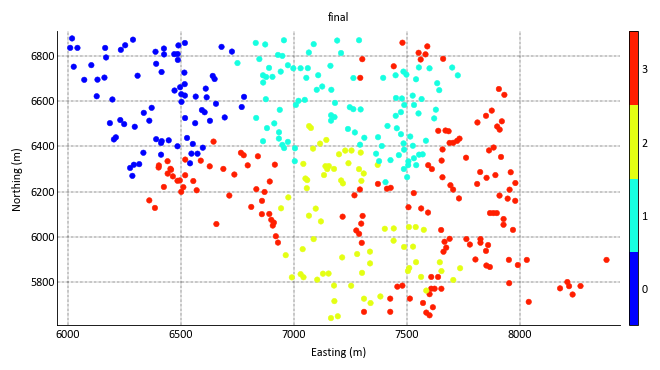

In [13]:
datfl.data['final'] = dss.predict(4, method='spec')
gs.locmap(datfl, var='final', cmap='jet', figsize=(6, 6))

# test the scripting stuff

In [14]:
! where dssens

C:\Anaconda3\Scripts\dssens.exe


In [15]:
dssens = gs.Program('dssens')
dssenspar = """START OF DATA:
testdat.dat         - file with the input dataset
1  2  0             - columns for x, y, z data
3  4  5  6          - columns for variables (implicit nvar)
outfile.out         - file for clustering output
1    1              - save all reals? recode clusters? (0=No, 1=Yes)
1                   - append output to input file? (0=No, 1=Yes)
1                   - number of parallel processes

START OF DSS:       # dual-space-search settings
25                  - number of nearest neighbors
10                  - number of neighbors taken at spatial search
0  0  0             - search anisotropy/ ang1, ang2, ang3
500 500 500         - range1, range2, range3

START OF ENS:       # ensemble settings
512671              - random seed
100                 - number of clusterings to generate
4  6                - final nclus, target nclus
0.001 0.999         - min and max proportion in found clustering
spec                - final consensus method, `spec(tral)` or `hier(archical)`

"""
dssens.run(parstr=dssenspar)

C:\GIT\python-local\spatialcluster\spatialcluster\examples\tmpkkhrfg_5\dssensemble.par has been copied to the clipboard
Calling:  ['dssens', 'temp']

Clusterings: 100%|##########| 100/100 [00:04<00:00, 23.86it/s]
Reading parfile from `temp`


In [16]:
datfl.data['final_prog'] = gs.DataFile("outfile.out").data['dssen_clusters']

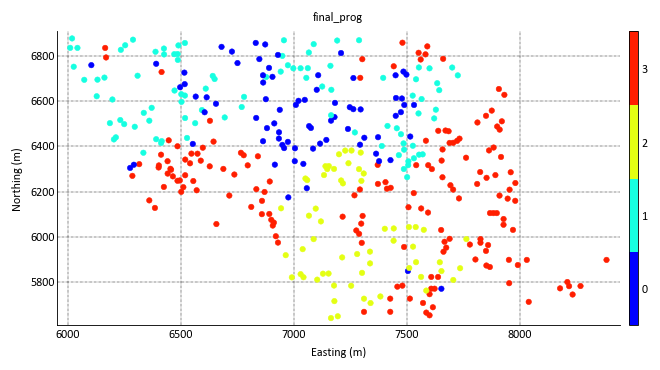

In [17]:
gs.locmap(datfl, var='final_prog', cmap='jet', figsize=(6, 6))